# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset** 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
# Importing PCA and t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

### **Loading the data**

In [2]:
df = pd.read_csv('auto-mpg.csv')

### **Data Overview**

- Observations
- Sanity checks




In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [4]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,chevy s-10


## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**
- There are 398 rows in dataset with 8 columns
- Of the 8 columns three are of dtype float64 (mpg, displacement, acceleration), three columns are of dtype int64 (cylinders, weight, model year), 2 are objects (horsepower, car name)
- The floats and integers are fine, but need to look at car name and horsepower, since horsepower should be an integer or float.

In [6]:
# Horsepower has a '?' character in the column, have to remove before changing dtype of column
df['horsepower'].replace('?', np.nan, inplace=True)

In [7]:
# Remove rows with Na values from the DataFrame
df = df.dropna()

In [8]:
# Convert horsepower column to integer
df['horsepower'] = df['horsepower'].astype(int)

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(392, 8)

**Observations:**
- After removing rows with '?', there are 392 rows out of the original 398 rows.
- Horsepower is now an integer, leaving the only object column to car name. 
- There are no null values left in the data
- There are no duplicates in the data 

In [12]:
df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
car name        301
dtype: int64

In [13]:
df = df.drop(columns=['car name'], axis = 1)

**Observations:**
- There are too many car names in the dataset for it to be a interesting column, so we will drop the column
- If we encoded the column in the current state, we would be left with a sparse matrix

### **Summary Statistics**

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


**Observations:**
- mpg: seems to be fairly normally distributed since the mean is 23.4 and the median is 22.75
- cylinders: There doesnt seem to be any outliers in this column
- displacement: Displacement seems to be on the lower side with the median being 151 and the mean being 194, so the mean is being moved by the max
- hosepower: The mean is 93 and the median is 104. There doesnt seem to be any outliers in this column
- weight: The mean and median are about the same with the mean being 2977 and the median being 2803
- acceleration: The mean and median are about the same with the mean being 15.54 and the median being 15.50
- model year: The mean and median are about the same with the mean being 75 and the median being 76

### **Univariable Analysis**

In [15]:
# Defining the hist_box(col) function which will plot a boxplot and distplot for a given column in the dataframe
def hist_box(col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(15, 10))
    sns.set(style='darkgrid')
    
    # Adding a graph in each part
    sns.boxplot(x=df[col], ax=ax_box, showmeans=True)
    sns.distplot(x=df[col], ax=ax_hist)
    
    # Adding descriptive statistic labels for visualizing the data
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    q1_val = df[col].quantile(0.25)
    q2_val = df[col].quantile(0.5)
    q3_val = df[col].quantile(0.75)
    
    ax_hist.axvline(mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax_hist.axvline(median_val, color='orange', linestyle='-', label=f'Median: {median_val:.2f}')
    
    # Adding vertical lines for quartiles
    ax_hist.axvline(q1_val, color='blue', linestyle=':', label=f'Q1: {q1_val:.2f}')
    ax_hist.axvline(q2_val, color='purple', linestyle=':', label=f'Q2: {q2_val:.2f}')
    ax_hist.axvline(q3_val, color='red', linestyle=':', label=f'Q3: {q3_val:.2f}')
    # Display the legend
    ax_hist.legend()
    # Display the plot
    plt.show()

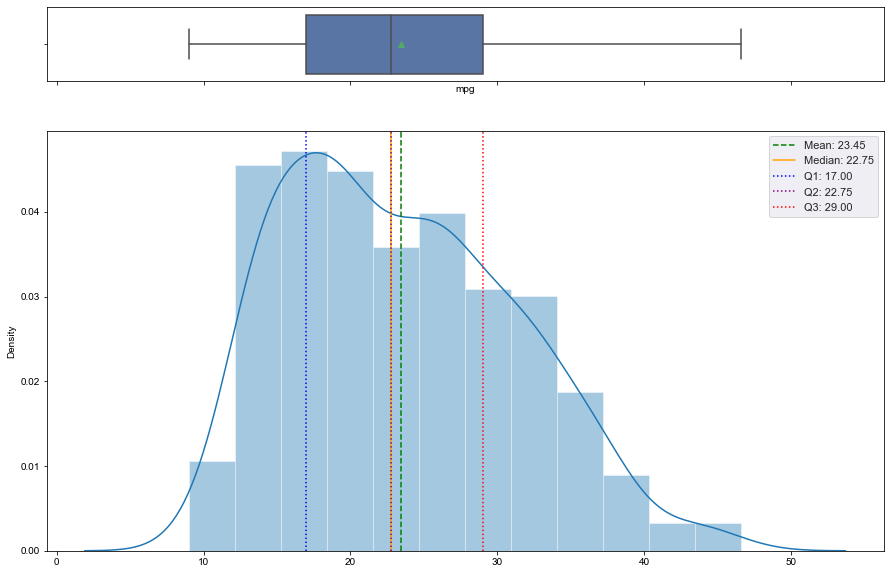

In [16]:
hist_box('mpg')

**Observations:**
- The mpg column is fairly symmetrical as the mean and median are about the same, with some slight right skewness.
- There are no outliers in the data

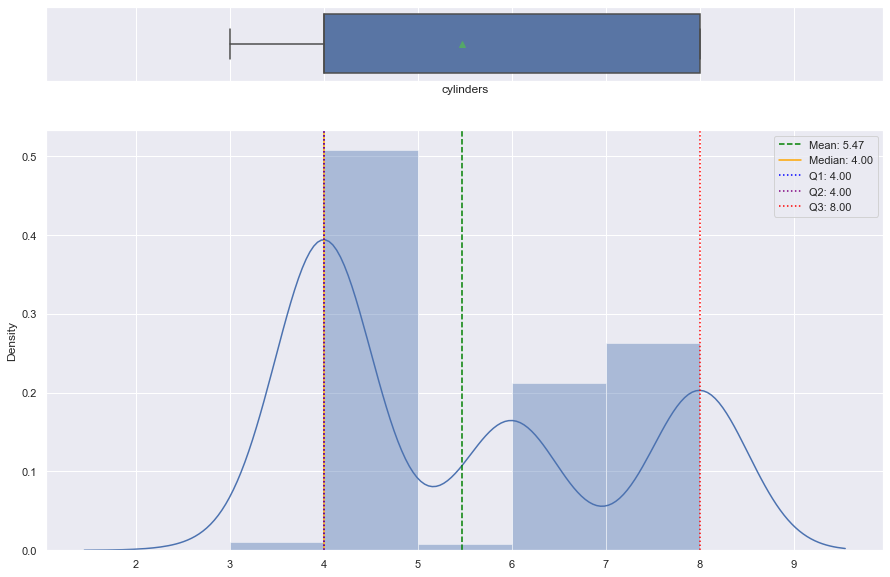

In [17]:
hist_box('cylinders')

**Observations:**
- There seems to be two or three groups of cyblinders in the data. Group 1 is around 4 cylinders and Group 2 is 6 cylinders and group 3 having 8 cylinders
- There are no outliers in the data

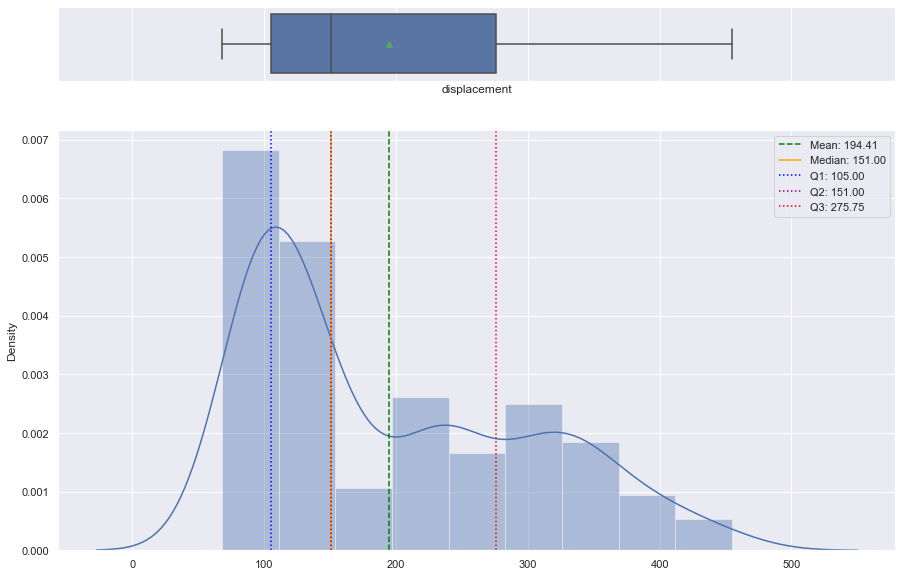

In [18]:
hist_box('displacement')

**Observations:**
- The data is right skewed with the mean being 194 and the median being 151.
- There are no outliers in the data

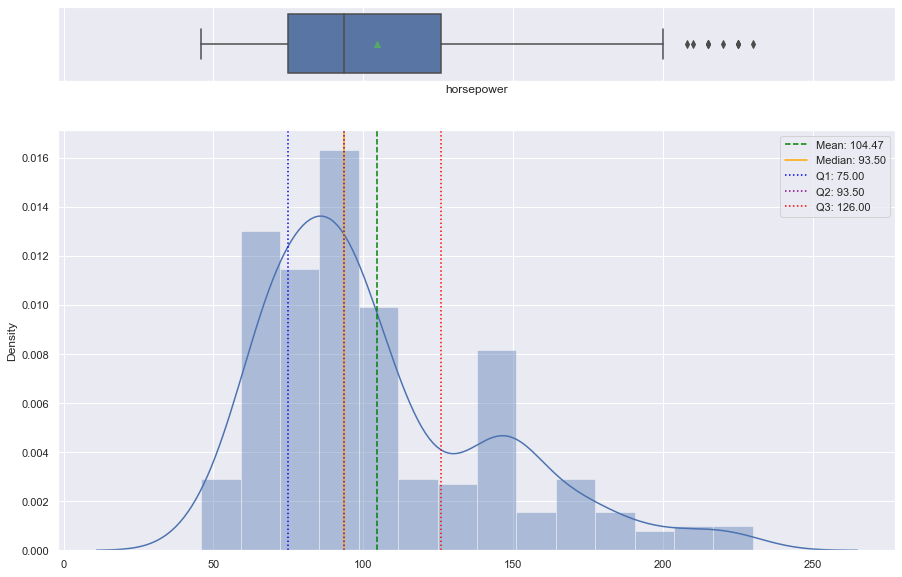

In [19]:
hist_box('horsepower')

**Observations:**
- horsepower is skewed to the right and their are some outliers in the data.
- The mean is 104 and the median is 93

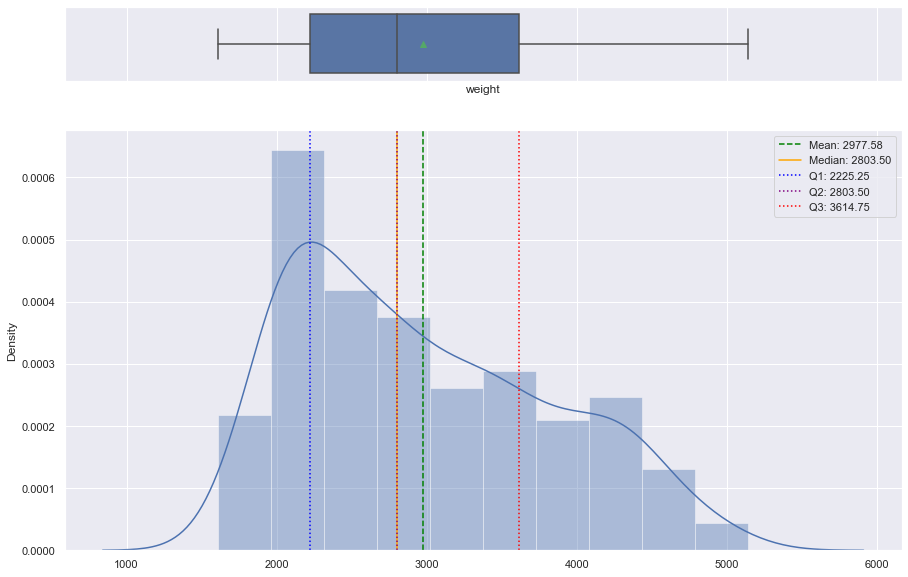

In [20]:
hist_box('weight')

**Observations:**
- The mean is 2977 and median is 2803 so the data is slightly skewed to the right.
- There are no outliers in the data

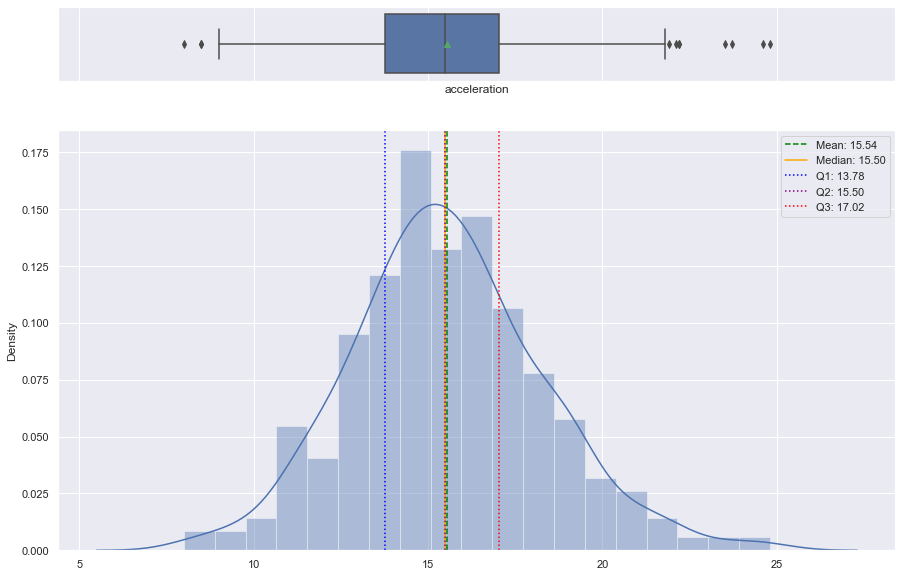

In [21]:
hist_box('acceleration')

**Observations:**
- The data seems normally distributed with the mean being 15.54 and the median being 15.50
- There are outliers on both sides 

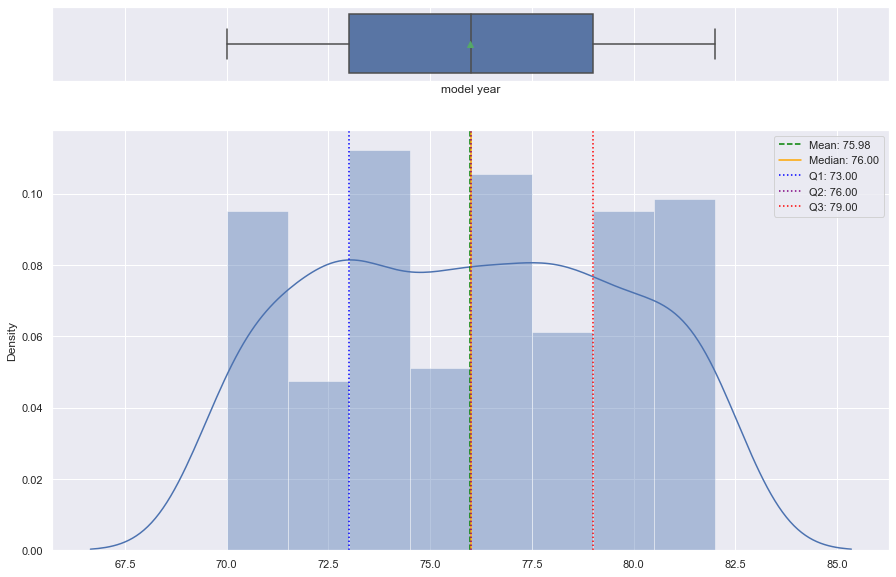

In [22]:
hist_box('model year')

**Observations:**
- The mean is 75 and the median is 76 so the data is  fairly symetric
- There are no outliers in the data

### **Bivariable Analysis**

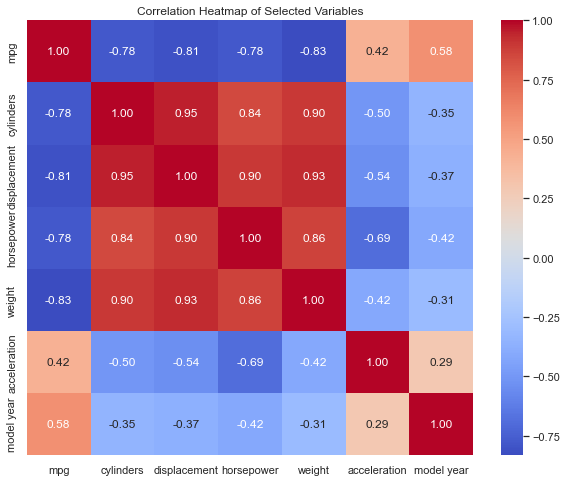

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Selected Variables")
plt.show()

**Observations:**
- mpg: Mpg is heavily negativly correlated with cylinders(-.78), displacement(-.81), horsepower(-.78), weight(-.83). It is positively correlated with acceleration (.42) and model year (.58). So as mpg goes up most variables go down and acceleration and model year goes up. So newer cars seem to have higher mpg and acceleration.
- cylinders: cylinders is heavily positive correlated with displacement (.95), horsepower (.84), weight (.90). It is negatively correlated with acceleration (-.50), model year (-.35), and mpg (-.78). So as cylinders goes up half of variables go up and half go down. Newer cars have fewer cylinders.
- Dissplacement: dissplacement is positive correlated with cylinders (.95), horsepower (.90), and weight (.93). It is negatively correlated with mpg (-.81), acceleration (-.54), and model year (-.37).
- horsepower: horsepower is positive correlated with cylinders (.84), displacement (.90), amd weight (.86). It is negatively correlated with mpg (-.78), acceleration (-.69), and model year (-.42).
- weight: weight is positive correlated with cylinders (.90), displacement (.93), amd horsepower (.86). It is negatively correlated with mpg (-.83), acceleration (-.42), and model year (-.31).
- acceleration: acceleration is positivly correlated with mpg (.42) and model year (.29). It is negatively correlated with cylinders (-.5), displacement (-.54), horsepower (-.69), and weight (-.42).
- model year: model year is positive correlated with mpg (.58), acceleration (.29). It is negatively correlated with cylinders (-.35), displacement (-.37), horsepower (-.42), and weight (-.31). Newer cars have higher mpg and acceleration, but has less cylinders, displacement, horsepower, and weight.

**Notable takeaways:**
- Features with high mpg have high acceleration and low cylinder, displacement, horsepower, and weight. Features with low mpg and acceleration have higher cylinders, displacement, horsepower, and weight.

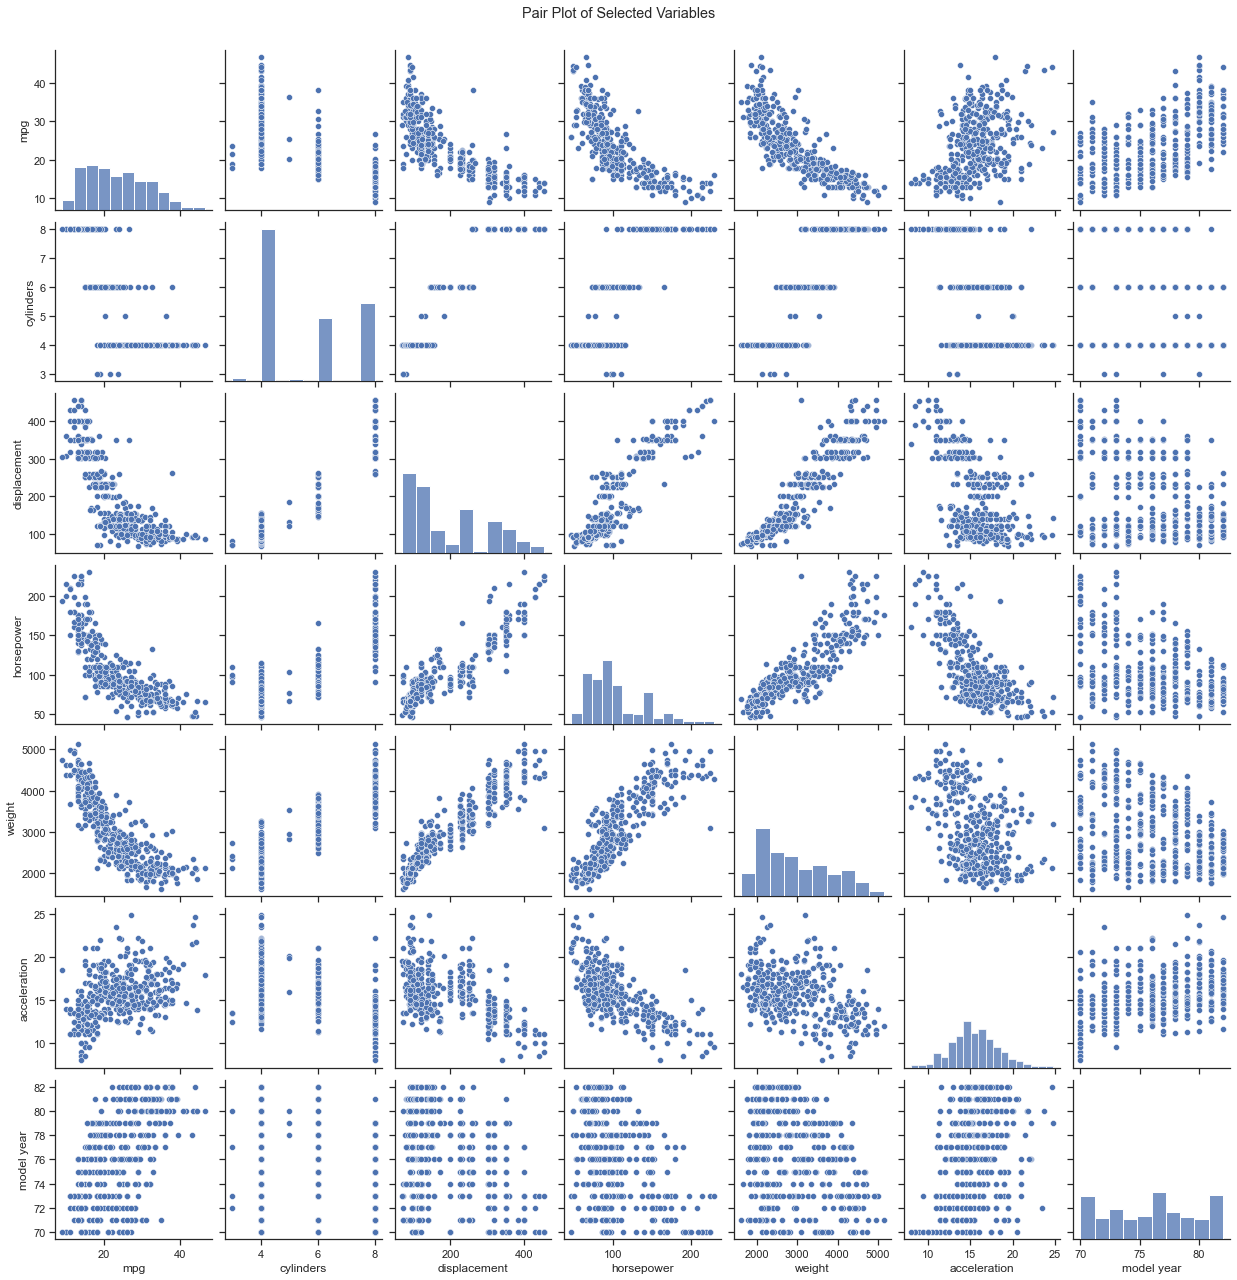

In [24]:
# Create a pair plot using seaborn
sns.set(style='ticks')
sns.pairplot(df[:])
plt.suptitle("Pair Plot of Selected Variables", y=1.02)
plt.show()

**Observations:**
- mpg: We can see a negative correlation with cylinders, displacement, horsepower, and weight. We can see a positive correlation with acceleration, and model year.
- cylinders: We can see a negative correlation with mpg, acceleration, and model year, although it it hard to see for model year on the graph. We can see a positive correlation with displacement, horsepower, and weight.
- displacement: We can see a negative correlation with mpg, and model year. We can see a positive correlation with cylinders, horsepower, and weight.
- horsepower: We can see a negative correlation with mpg, acceleration, and model year. We can see a positive correlation with displacement, weight, and cylinders.
- weight: We can see a negative correlation with mpg, acceleration, and model year.
- acceleration: We can see a negative correlation with cylinders, displacement, horsepower, and weight. We can see a positive correlation with mpg, and model year.
- model year: There is a positive correlation with mpg and acceleration. There is a negative correlation with cylinder, displacement, horsepower, and weight.

### **Scaling the data**

In [25]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

## **Principal Component Analysis**

In [26]:
# Defining the number of principal components to generate
n = df_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components = n, random_state = 1)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

**Observations:**
- The first two principal components explain about 83% of the data.

#### **Interpret the coefficients of the first three principal components from the below DataFrame**

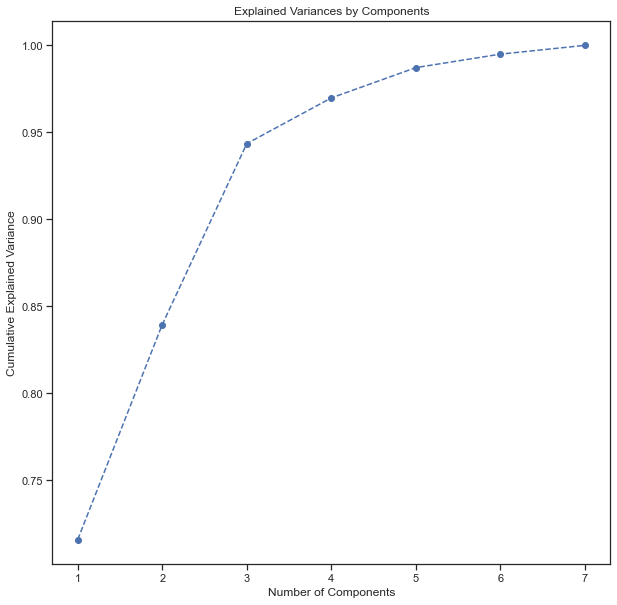

In [27]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [28]:
# Find the explained variance for two components
sum = 0

for ix, i in enumerate(exp_var):
    
    sum = sum + i
    
    if(sum>=0.83):
        print("Explained variance for two components: ", ix + 1)
        break

Explained variance for two components:  2


In [29]:
# Making a new dataframe with first 5 principal components as columns and original features as indices
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2), index = pc_comps, columns = df_scaled.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.20,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.01,0.89
model year,-0.23,-0.91,-0.04


**Observations:**
- PC1: The first principal component is mostly about displacement (.43), horsepower(.42), and cylinders(.42), and weight(.41). mpg is also very important but in a negative correlation (-.40). Notibly acceleration(-.28) and model year(-.23) are the least important for this component.
- PC2: The second principal component is mostly about model year (-.91).
- PC3: The third principal component is mostly about acceleration (.89)

#### **Visualize the data in 2 dimensions using the first two principal components**



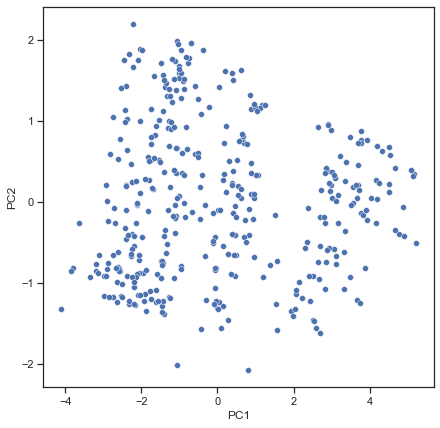

In [30]:
plt.figure(figsize = (7,7))

sns.scatterplot(x = df_pca[0], y = df_pca[1], legend=False)

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Observations:**
- While we can start to see groupings, its unlear how many there are. From what we know from t-SNE there are three groups and this grouping is not good.

## **t-SNE**

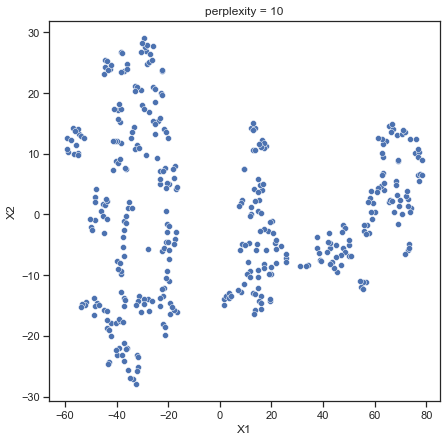

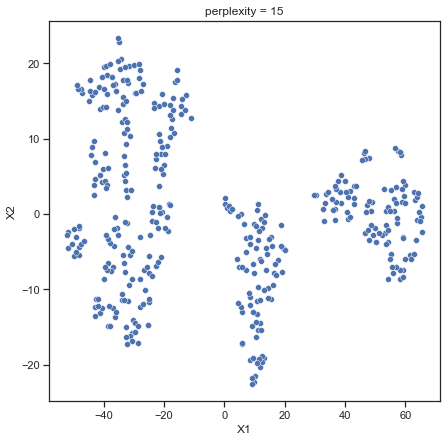

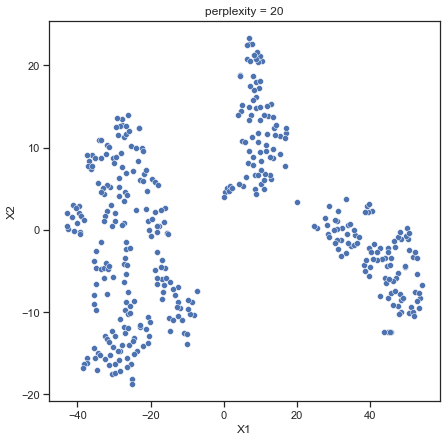

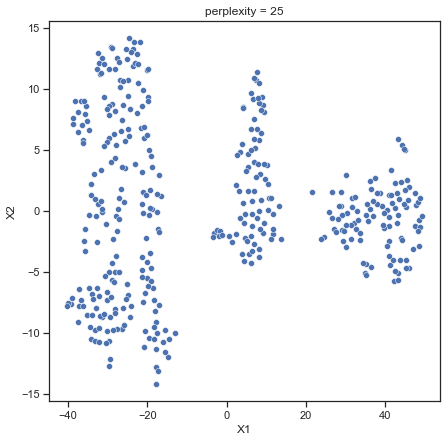

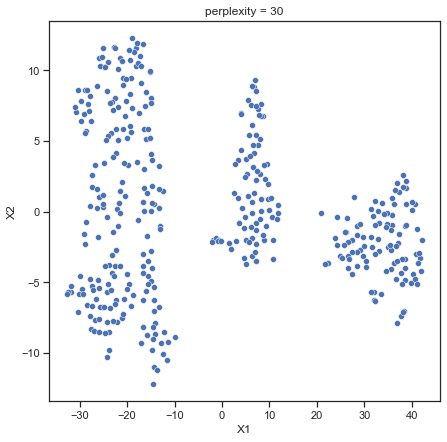

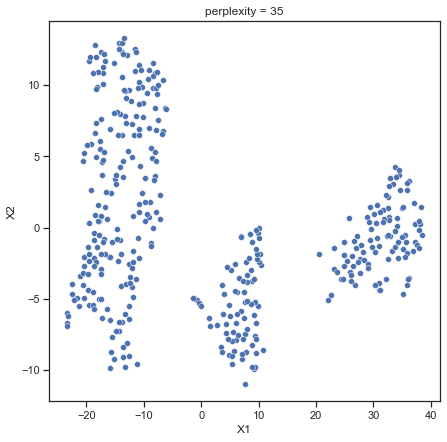

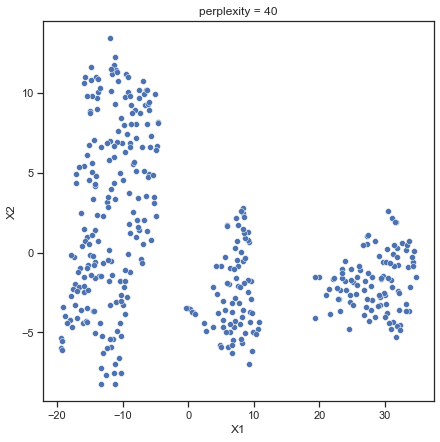

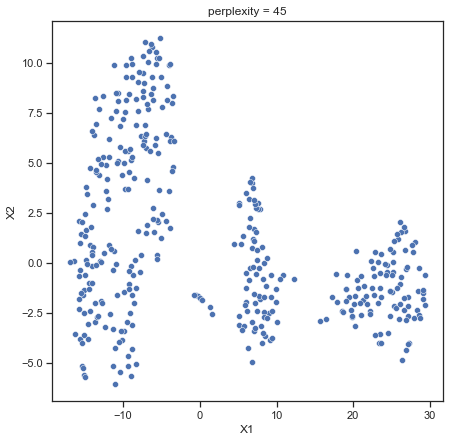

In [31]:
# Loop through perplexity so we can see which perplexity value is best for grouping the data
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    
    data_tsne = tsne.fit_transform(df_scaled)
    
    data_tsne = pd.DataFrame(data_tsne)
    
    data_tsne.columns = ['X1', 'X2']
    
    plt.figure(figsize = (7,7))
    
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    
    plt.title("perplexity = {}".format(i))

Text(0.5, 1.0, 'perplexity = 45')

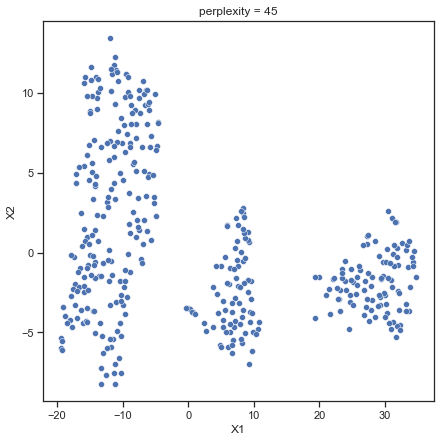

In [32]:
# Perplexity of 40 seems to be a good fit for grouping the data into disinct groups with large distance between them.
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 40)
    
data_tsne = tsne.fit_transform(df_scaled)
    
data_tsne = pd.DataFrame(data_tsne)
    
data_tsne.columns = ['X1', 'X2']
    
plt.figure(figsize = (7,7))
    
sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    
plt.title("perplexity = {}".format(i))

**Observations:**
- We can clearly see three clusters in the data with t-SNE

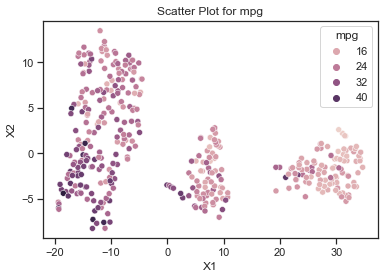

In [33]:
column = 'mpg'
# Scatter plot for the current column as hue
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = df[column])
# Set plot title
plt.title(f'Scatter Plot for {column}')
# Show the plot
plt.show()


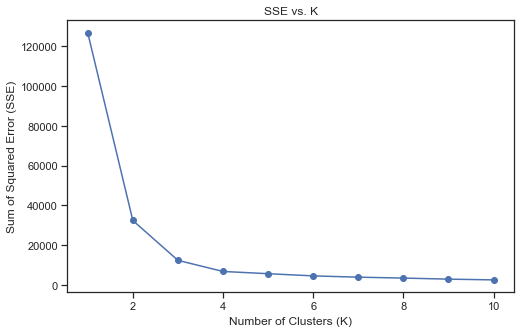

In [34]:
# Initialize a dictionary to store SSE for each K
sse = {}

# Run for a range of Ks and store SSE for each run
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_tsne)  
    sse[k] = kmeans.inertia_

# Plot the SSE vs K and plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('SSE vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

**Observations:**
- We can see the elbow at 3 groups, this aligns with what we see in the graphs above. So, 3 clusters seems to be the best fit for maximizing SSE and minimizing the number of clusters.

In [35]:
# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_tsne)

KMeans(n_clusters=3, random_state=42)

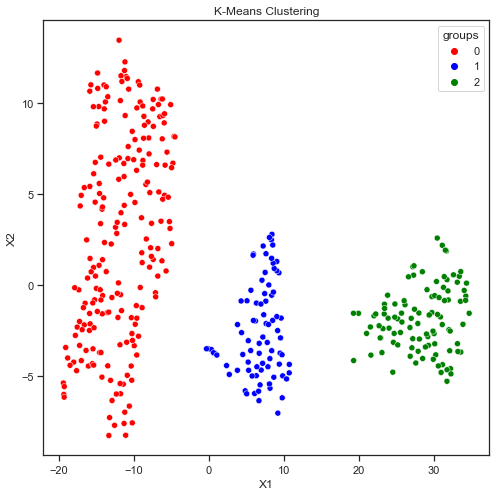

In [36]:
# Add cluster labels to your DataFrame
data_tsne['groups'] = kmeans.labels_
df['groups'] = kmeans.labels_
# Define a custom color mapping for the groups
color_mapping = {0: 'red', 1: 'blue', 2: 'green'}
# Create a scatter plot 
plt.figure(figsize=(8, 8))
sns.scatterplot(x=data_tsne['X1'], y=data_tsne['X2'], data=data_tsne, hue=data_tsne['groups'], palette=color_mapping)
plt.title("K-Means Clustering")
plt.show()

**Observations:**
- We can clearly see three groups using t-SNE, we also get three groups using an elbow plot. When we apply k-means we can see the three groups above.

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

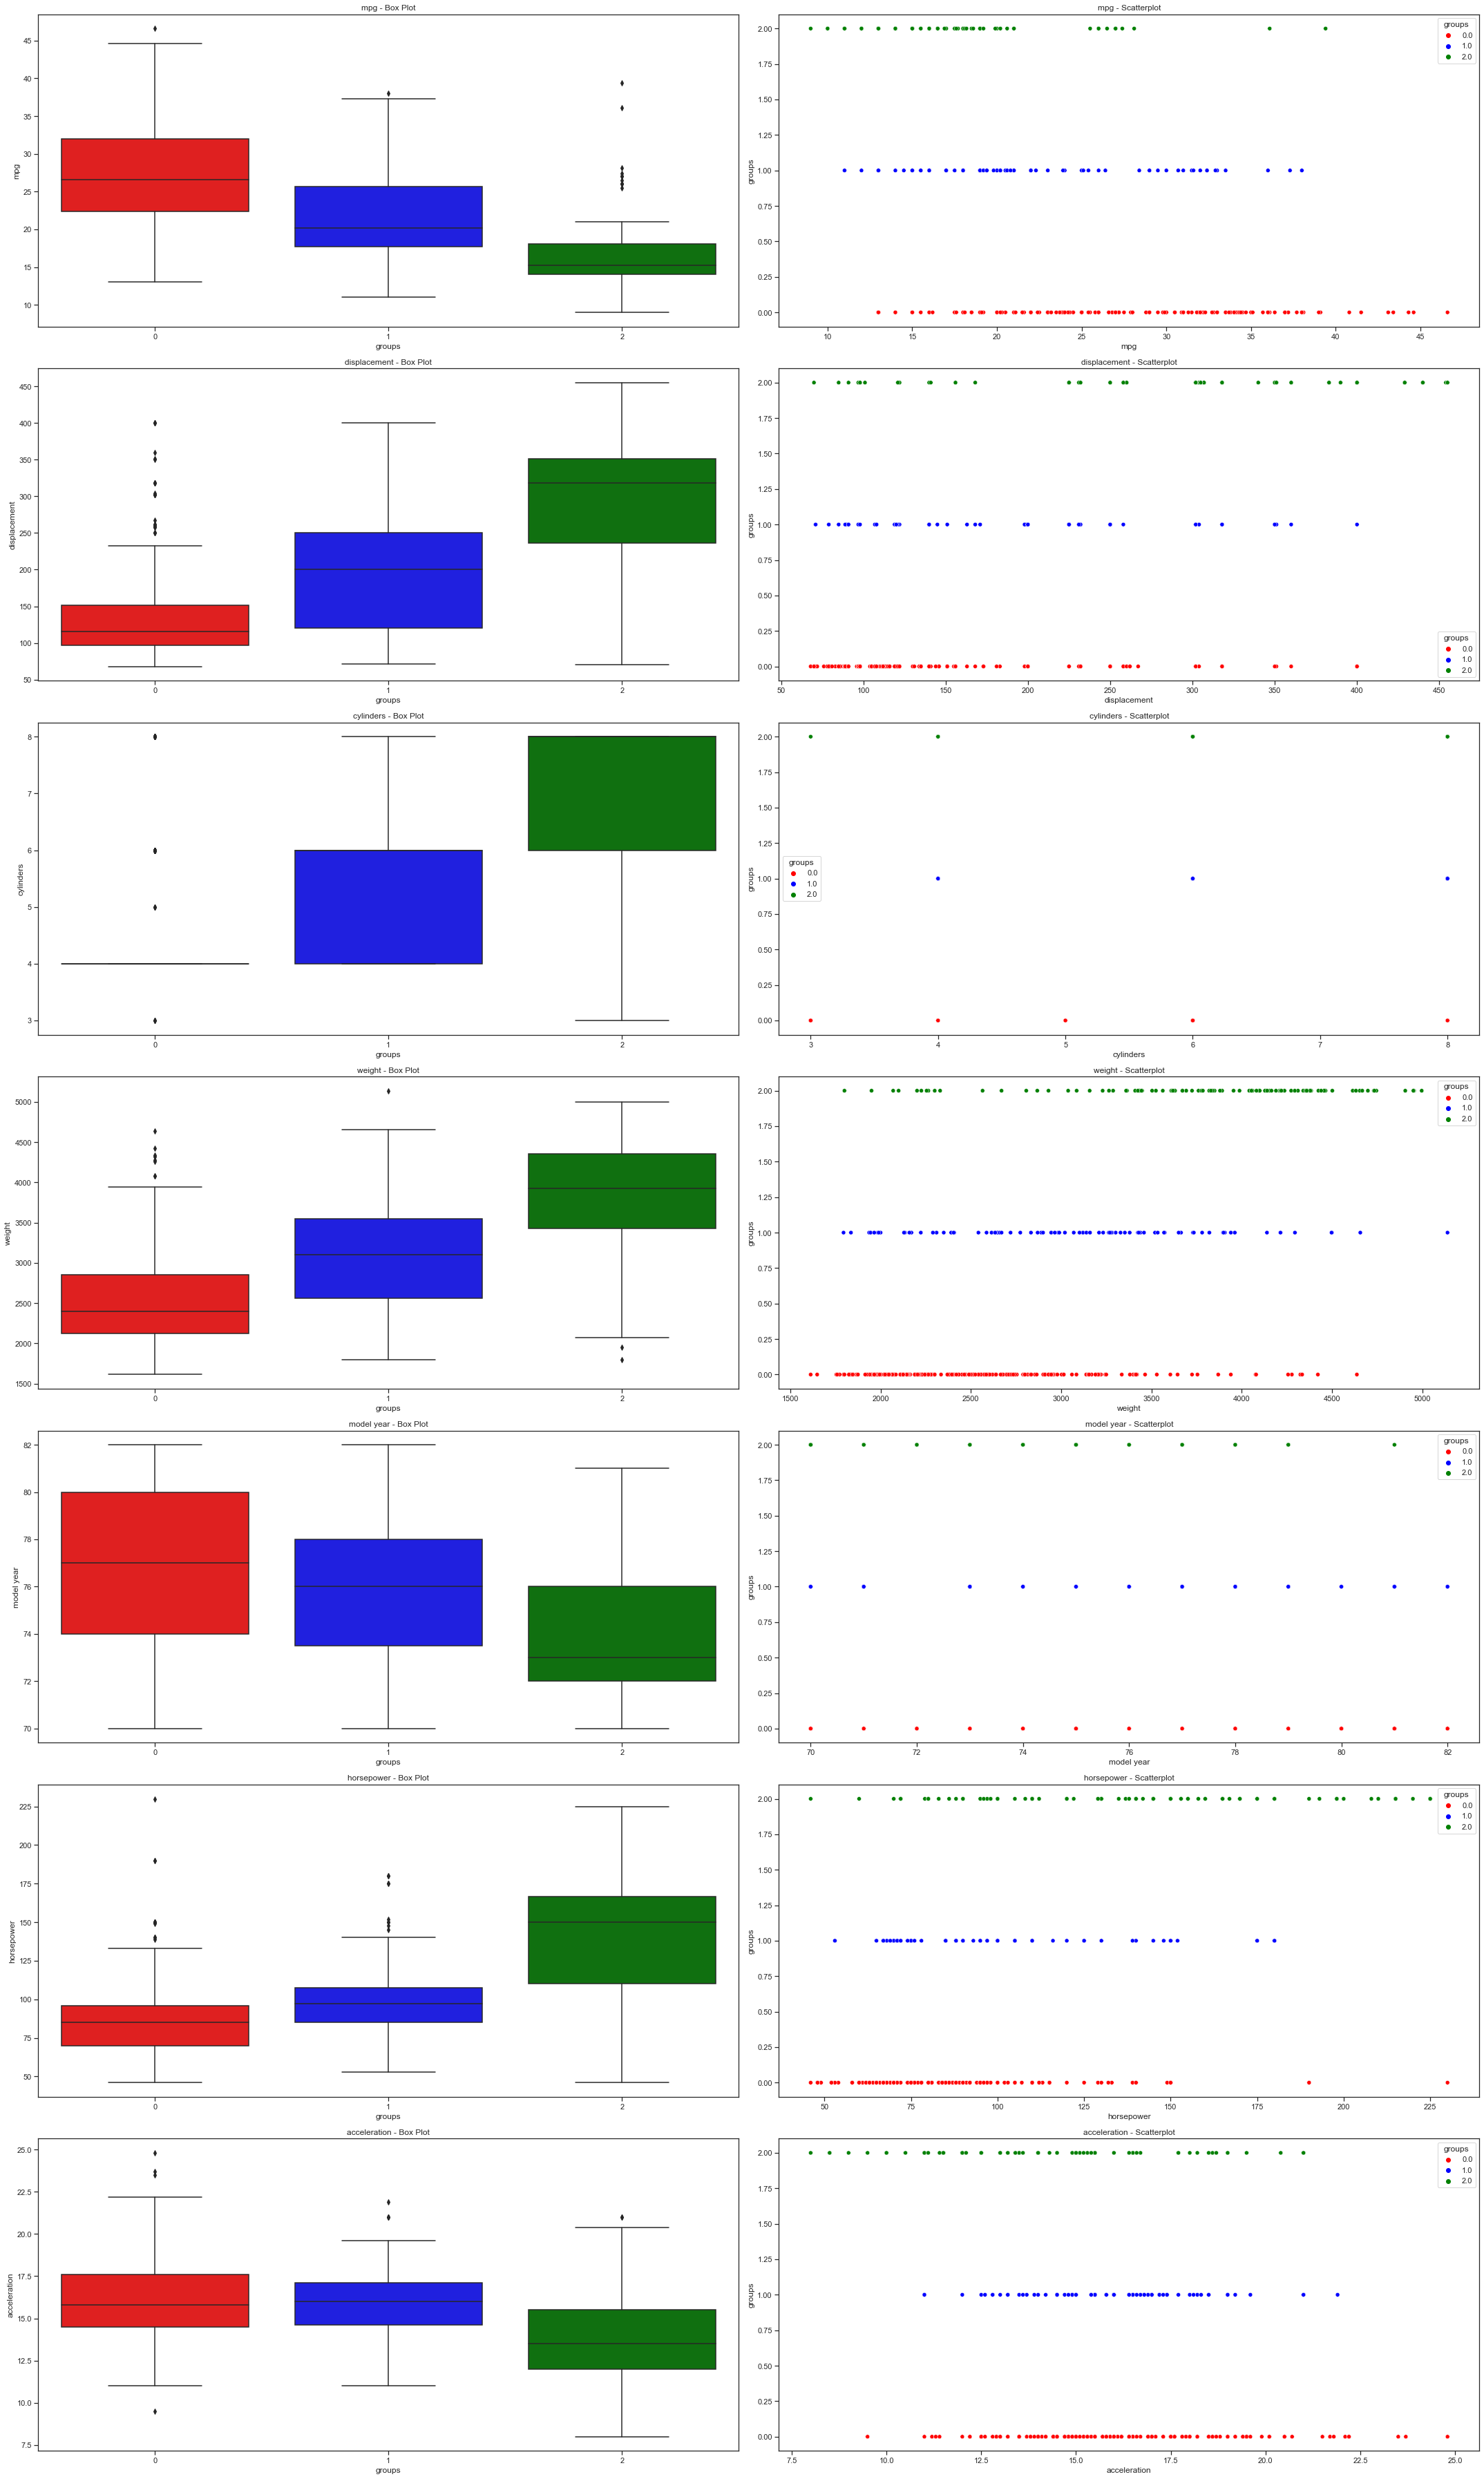

In [37]:
# Select all relevent columns
all_col = ['mpg', 'displacement', 'cylinders', 'weight', 'model year', 'horsepower', 'acceleration']
# all_col = df.columns.tolist()

# Create a figure with subplots
plt.figure(figsize=(30, 50))

# Define the number of rows and columns for the subplots
num_rows = len(all_col)
num_cols = 2  # Two columns for K-Medoids and K-Means

# Iterate through each variable
for i, variable in enumerate(all_col):
    plt.subplot(num_rows, num_cols, i * num_cols + 1)

    # Create box plots 
    sns.boxplot(y=df[variable], x=data_tsne['groups'], palette=color_mapping)
    plt.title(f'{variable} - Box Plot')

    plt.subplot(num_rows, num_cols, i * num_cols + 2)

    # Create scatterplot 
    sns.scatterplot(x=df[variable], y=data_tsne['groups'], palette=color_mapping, hue=data_tsne['groups'])
    plt.title(f'{variable} - Scatterplot')

plt.tight_layout()
plt.show()

In [38]:
variables = ['mpg', 'displacement', 'cylinders', 'weight', 'model year', 'horsepower', 'acceleration']
df.groupby('groups')[variables].describe()

mpg                                                        \
        count       mean       std   min   25%    50%     75%   max   
groups                                                                
0       208.0  29.137019  5.778306  18.0  25.0  28.05  32.925  46.6   
1        82.0  19.662195  3.089674  15.0  18.0  19.00  21.000  32.7   
2       102.0  14.882353  2.712911   9.0  13.0  14.00  16.000  26.6   

       displacement                                                            \
              count        mean        std    min    25%    50%    75%    max   
groups                                                                          
0             208.0  110.367788  24.710216   68.0   91.0  106.0  122.0  262.0   
1              82.0  219.585366  31.841409  146.0  200.0  231.0  250.0  260.0   
2             102.0  345.558824  46.850631  231.0  305.5  350.0  360.0  455.0   

       cylinders                                              weight  \
           count      mean       std  min  25%  50%  75%  max  count   
groups                                                                 
0          208.0  4.014423  0.268802  3.0  4.0  4.0  4.0  6.0  208.0   
1           82.0  6.048780  0.310413  6.0  6.0  6.0  6.0  8.0   82.0   
2          102.0  7.980392  0.198030  6.0  8.0  8.0  8.0  8.0  102.0   

                                                                          \
               mean         std     min     25%     50%      75%     max   
groups                                                                     
0       2325.942308  360.033300  1613.0  2061.5  2250.0  2582.75  3530.0   
1       3215.073171  346.644400  2472.0  2945.0  3222.0  3431.50  4060.0   
2       4115.500000  450.641517  3086.0  3788.0  4140.5  4412.75  5140.0   

       model year                                                     \
            count       mean       std   min   25%   50%   75%   max   
groups                                                                 
0           208.0  77.072115  3.723485  70.0  74.0  78.0  80.0  82.0   
1            82.0  75.841463  3.175794  70.0  74.0  76.0  78.0  82.0   
2           102.0  73.862745  3.005076  70.0  72.0  73.0  76.0  81.0   

       horsepower                                                             \
            count        mean        std    min     25%    50%    75%    max   
groups                                                                         
0           208.0   78.764423  14.657022   46.0   68.00   78.0   90.0  115.0   
1            82.0  101.207317  12.189591   72.0   95.00  100.0  110.0  133.0   
2           102.0  159.509804  27.336823  105.0  142.75  150.0  175.0  230.0   

       acceleration                                                         
              count       mean       std   min     25%   50%     75%   max  
groups                                                                      
0             208.0  16.563942  2.410504  11.6  14.775  16.2  18.000  24.8  
1              82.0  16.345122  2.110594  11.3  15.175  16.1  17.675  22.2  
2             102.0  12.809804  1.941955   8.0  11.500  13.0  14.000  19.0

**Observations:**
- Group 0: Group 0 makes up **208 observations** which is the majority of observations. This group has the largest mpg mean of 29. From what we observed ealier is that cars with higher mpg usually hat a higher model year and acceleration. We observe that the mean model year for this group is 77 which is the highest mean of all the groups. When we look at acceleration we see that it also has the highest acceleration mean of 16.56 however, its not much higher than group 1. From earlier we also saw that cars with higher mpg has low cylinders, displacement, weight, and horsepower. We observe that Group 0 has the lowest mean cylinders of 4 with a max of 6, this fits in what we thought ealier where we had groups of number of cylinders in the data. We also observe that displacement is the lowest with a mean of 110, weight is the lowest with a mean of 2325, and horsepower is the lowest with a mean of 78.
- Group 1: Group 1 makes up **82 observations** which is the smallest group. This group has the second highest mpg with a mean of 19.66. The mean displacement is the second highest with 219. The mean cylinders is 6, the second highest in the group. The mean weight is also the second highest with 3215. The model year mean is 75 making it the second lowest mean model year. We observe that horsepower is 101 which is again in the middle of our other groups. The mean acceleration of this group is also in the middle, although it is very close to Group 0 with a mean of 16.3. We can see that this group is inbetween our other groups on all of our features, which is where it was in our graphs above.
- Group 2: Group 2 is the second largest group with **102 observations**. This group is going to be the oposite of group 0 in many ways. We see that it has the lowest mpg with a mean of 14.88. Therefore, it should have the highest in cylinders, displacement, weight, horsepower, and it will have the lowest model year and acceleration. When we observe the data we see that as it has the lowest displacement of a mean of 345. The mean number of cylinders is 7.98 the highest of the groups and the mean weight is 4115 the highest of all the groups. Horsepower is also the highest of all the groups with a mean average of 159.5. When looking at model year and acceleration we see that the mean is the lowest of all the groups. Model year with a mean of 73.86 and acceleration of 12.8. 
- These groupings and the statistics on the groups make sense with the correlation matrix 

## **Actionable Insights and Recommendations**

**Insights and Recommendations:**
- Insights: 
    - Group 0: makes up the majority of cars in our vintage car dataset, with a total of 208 observations. This group of vintage cars tends to be on the newer side compared to the other groups. This group also tends to have much higher mpg compared to the other groups. This group also tends to have much higher acceleration compared to the other groups. These are the distiguashing characteristics of this group in our data.
    - Group 1: makes up the least number of cars in our vintage car dataset, with a total of 82 observations. This group of vintage cars tends to be inbetween Group 0 and Group 2 on all measures. The group doesnt have as high mpg, acceleration, it is much higher than Group 2. The group is also in the middle when it comes to model year as well as all the other features, such as weight, cylinders, displacement, horsepower. 
    - Group 2: makes up the second most vintage cars in our dataset, with a total of 102 observations. This group of vintage cars tends to be the opposite of Group 0, meaning anything Group 1 is high on (mpg) this group is low on, and anything Group 0 is low on (cylinders) this group is high on. These cars are also the oldest vintage cars in our dataset. 

- Recommendations:
    - Group 0: These cars should be targeted for customers who prioritize mpg, acceleration over model year, horsepower, cylinders, displacement, and weight. Meaning these cars should be targeted for customers who want a vintage car but also care about mpg.
    - Group 1: These cars are in the middle of the three groups, so there can be a lot of overlap. Meaning people who want the oldest vintage car or a vintage car with higher mpg, can still find a car in this group. Inless a customer wants a vintage car with really high mpg and acceleration, this group can still be recommended to them. Same goes for customers who want a really only vintage car, this group can still provide that. So, if a customer wants a bit of mpg, and an older model year, this group can provide that to the customer.
    - Group 2: These cars should be targeted for customers who do not prioritize mpg or acceleration, but they prioritize how old the car is and is a more classis build. This classis build is low mpg, high horsepower, cylinders, displacement, weight. Customers who are recommended this car should really not care about mpg since this groups mean mpg is very low compared to the other groups.


In [39]:
!jupyter nbconvert --to html Learner_Notebook_PCA_and_tSNE_Project_FullCode_Version.ipynb

[NbConvertApp] Converting notebook Learner_Notebook_PCA_and_tSNE_Project_FullCode_Version.ipynb to html
[NbConvertApp] Writing 2534221 bytes to Learner_Notebook_PCA_and_tSNE_Project_FullCode_Version.html
